In [1]:
import sys
import os


os.chdir(r"C:\Projects ML\Stock_Predictor")
sys.path.append(os.path.abspath(".."))  # Add project root to Python path

from src.data_fetcher import fetch_stock_data

data = fetch_stock_data("TSLA", "2024-01-01", "2025-01-01")
print(data.head())

C:\Projects ML\Stock_Predictor\src\data_fetcher.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Saved data to C:\Projects ML\Stock_Predictor\data\TSLA_data.csv
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200
2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600
2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300
2024-01-05  237.490005  240.119995  234.899994  236.860001   92488900
2024-01-08  240.449997  241.250000  235.300003  236.139999   85166600


In [2]:
from src.preprocessing import load_and_engineer_features

df = load_and_engineer_features("data/TSLA_data.csv")
print(df.head())


         Price       Close        High         Low        Open     Volume  \
12  2024-01-17  215.550003  215.669998  212.009995  214.860001  103164400   
13  2024-01-18  211.880005  217.449997  208.740005  216.880005  108595400   
14  2024-01-19  212.190002  213.190002  207.559998  209.990005  102260300   
15  2024-01-22  208.800003  217.800003  206.270004  212.259995  117952500   
16  2024-01-23  209.139999  215.649994  207.750000  211.300003  106605900   

      Return       SMA10  Volatility  High_Low_spread  Close_Open_change  \
12 -0.019826  230.479001    0.018118         3.660004           0.690002   
13 -0.017026  227.822002    0.015722         8.709991          -5.000000   
14  0.001463  225.248003    0.016005         5.630005           2.199997   
15 -0.015976  222.379002    0.015702        11.529999          -3.459991   
16  0.001628  219.248003    0.014062         7.899994          -2.160004   

    Return_1d      EMA_12      EMA_26      MACD  \
12  -0.019826  230.645488  23

In [3]:
from src.model_training import train_model
model, acc, X_test, y_test, y_pred = train_model("data/AAPL_data.csv")


Model trained Successfully
Accuracy:  0.693878

 Confusion Matrix:
[[14  5]
 [10 20]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.80      0.67      0.73        30

    accuracy                           0.69        49
   macro avg       0.69      0.70      0.69        49
weighted avg       0.72      0.69      0.70        49

[0.07749873 0.10853911 0.05366489 0.08033308 0.05586022 0.08603255
 0.07821402 0.0696983  0.06879793 0.06328721 0.0930196  0.08861756
 0.07643669]


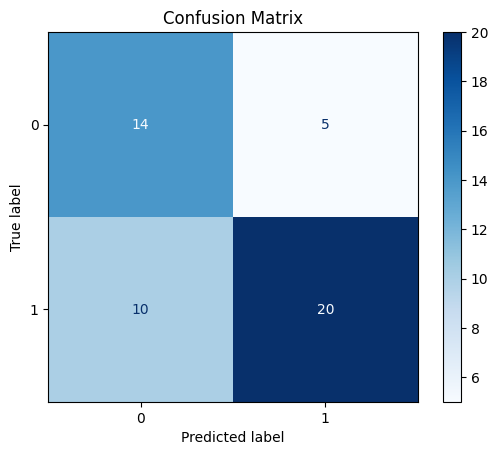

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


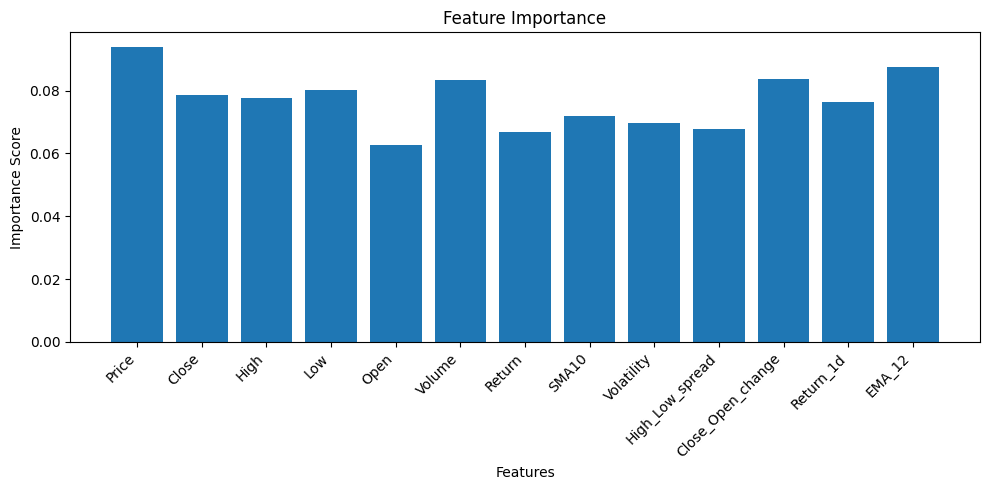

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = np.array([
    0.09384649, 0.07843527, 0.07762606, 0.08004777, 0.06257907,
    0.08341551, 0.06682889, 0.07186141, 0.06981107, 0.06788993,
    0.08380375, 0.0764642, 0.08739056
])

feature_names = [
    'Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'Return', 'SMA10',
    'Volatility', 'High_Low_spread', 'Close_Open_change', 'Return_1d',
    'EMA_12'
]

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score    support
0              0.583333  0.736842  0.651163  19.000000
1              0.800000  0.666667  0.727273  30.000000
accuracy       0.693878  0.693878  0.693878   0.693878
macro avg      0.691667  0.701754  0.689218  49.000000
weighted avg   0.715986  0.693878  0.697761  49.000000
